In [42]:
import sys, os

pysbf_path = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/"
sys.path.insert(0, pysbf_path)
from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [43]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = pysbf_path + 'pysbf/config/'



In [44]:
name = "u03396"

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

### Checking out the log file

In [45]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [46]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [47]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


In [48]:
Dmask = inFolder + "{}/{}j.dmask".format(name, name)
Dmask

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/u03396/u03396j.dmask'

In [49]:
r_aperture = 20  # [pix] radius of the avoding zone

# used Dmask instead of mask1
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

catal_df.head()

Outputs_u03396/u03396_6fd5c4cbba17/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,297.076,30.322,92.605841,79.923949,-11.8465,0.0233,3.088,2.144,-67.0,...,0.0258,0.0,-0.0,0.0,0.0,-11.6347,0.0164,-11.8544,0.0289,595.695711
1,2,513.721,28.650,92.579454,79.917221,-11.5371,0.0377,1.575,1.138,65.7,...,0.0840,0.0,-0.0,0.0,0.0,-9.8270,0.0544,-10.9715,0.0728,536.875179
2,3,151.373,26.129,92.624451,79.928370,-10.6273,0.0548,1.439,0.903,63.3,...,0.0582,0.0,-0.0,0.0,0.0,-9.6786,0.0469,-10.0788,0.0868,676.859861
3,4,387.014,5.426,92.598720,79.920693,-11.0844,0.0266,2.171,1.059,-78.3,...,0.0193,0.0,-0.0,0.0,0.0,-10.9444,0.0200,-11.0548,0.0283,584.991656
4,5,169.988,6.011,92.625348,79.927410,-9.7092,0.1005,0.964,0.961,-29.4,...,0.0678,0.0,-0.0,0.0,0.0,-9.0101,0.0638,-9.4114,0.1182,682.031253


## Ds9

Open ds9 and wait for its window to fully appear

In [115]:
os.system("ds9 "+sex_mask+" &")

0

### Regions Guid

- green: extended opbject
- red: star, point source
- cyan: ignored
- yellow: avoding zone

In [55]:
r_aperture = 60   # [pix] radius of the avoding zone

catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=2.0,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

make_se_lkn(catal_df, model=0, star_f=0.8, r_aperture=r_aperture, **Config)

os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")

Outputs_u03396/u03396_6fd5c4cbba17/obj.000.pro
wrote:  Outputs_u03396/u03396_6fd5c4cbba17/se_lknj.000
# of GCs:  117
# of galaxies:  812


0

In [56]:
sex_mask

'Outputs_u03396/u03396_6fd5c4cbba17//mask_sej.000'

- yellow: ignore
- cyan: point sources
- green: galaxies, extended objects

## Ds9 

In [166]:
# http://ds9.si.edu/doc/ref/xpa.html
os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")


# set image scale
os.system("xpaset -p ds9 scale log &")
os.system("xpaset -p ds9 scale limits -4100 200000 &")

# os.system("xpaset -p ds9 cmap grey &")
os.system("xpaset -p ds9 cmap value 7.9 0.47 &")

os.system("xpaset -p ds9 regions delete all")
rm = False

In [165]:
class my_button:
    
    def __init__(self, status):
        self.status = status
        self.button = widgets.Button(description='Regions On/Off')
        self.button.on_click(clicked)
        
    def clicked():
        self.on_off()
            
    def on_off(self):
        if self.status:
            os.system("xpaset -p ds9 regions delete all")
            self.status=False
        else:
            os.system("xpaset -p ds9 regions ./ds9.reg &")
            self.status=True    

widgets.VBox([my_button(rm).button])

## Deleting / Loading Regions

In [99]:
try:
    if rm:
        os.system("xpaset -p ds9 regions delete all")
        rm=False
    else:
        os.system("xpaset -p ds9 regions ./ds9.reg &")
        rm=True
except:
    rm = False


In [13]:
## create the maks of the extended objects + Dmask --> dophot

## Visualizations

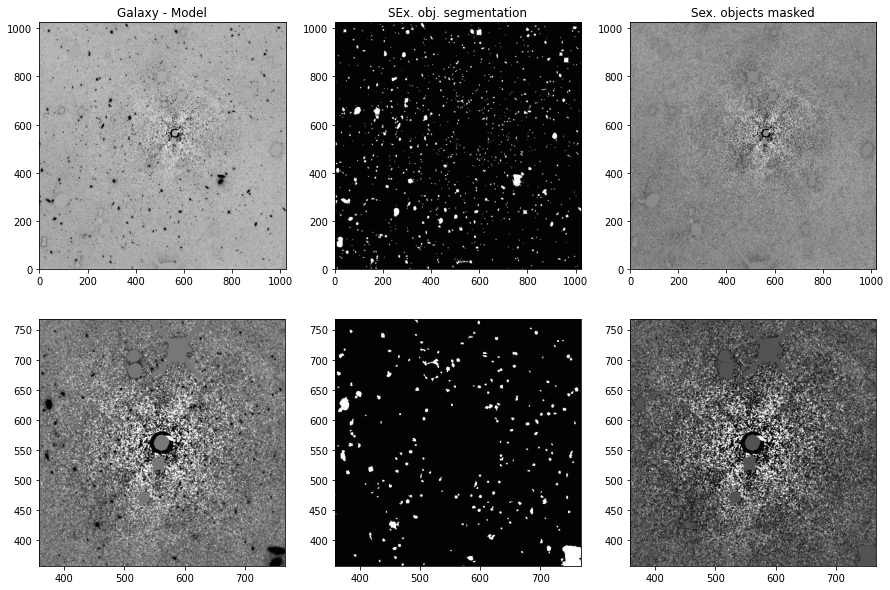

In [37]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


ax1 = tv(residual, ax=AX[0][0])
ax2 = tv(sex_objname, ax=AX[0][1])
ax3 = tv(sex_masked, ax=AX[0][2], options='')

ax1.set_title("Galaxy - Model")
ax2.set_title("SEx. obj. segmentation")
ax3.set_title("Sex. objects masked")

zoom = 5
ax1 = tv(sex_mask, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
ax2 = tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
ax3 = tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')

In [38]:
residual

'Outputs_u03396/u03396_6fd5c4cbba17//resid.000'

In [41]:
os.system("ds9 "+sex_masked+" &")

0

In [40]:
os.system("ds9 "+sex_mask+"  "+sex_objname+" &")

0